In [1]:
import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

plt.style.use('seaborn')

In [2]:
tab1 = pd.read_csv('table1.csv')

In [3]:
cp = tab1.concreq.values

c = tab1.stockconc.values

x = tab1.volume.values

xp = x*(c-cp)/cp

tab1['xp'] = xp

tab1 = tab1.astype('int')

In [4]:
tab2 =  pd.read_csv('tab2.csv')

tab2 = tab2.astype('float64')


In [5]:
tab2['total'] = tab2.csr + tab2.vsr / 60
x = tab2.total
mean = [np.mean([x[i-1],x[i]]) for i in range(len(x)) if i % 2 == 1]
print(*mean,sep = '\n')

86.9
85.25
81.9
79.2
76.7
72.05
70.6


In [6]:
tab2

,conc,csr,vsr,total
0,16.0,87.0,6.0,87.1
1,16.0,86.0,42.0,86.7
2,14.0,85.0,30.0,85.5
3,14.0,85.0,0.0,85.0
4,12.0,81.0,42.0,81.7
5,12.0,82.0,6.0,82.1
6,10.0,79.0,30.0,79.5
7,10.0,78.0,54.0,78.9
8,8.0,76.0,24.0,76.4
9,8.0,77.0,0.0,77.0


In [7]:
ro = 65 + 15/60
ro = np.array([ro for _ in range(7)])

In [8]:
angle = mean-ro
theta = angle[-1]

In [9]:
print(*["{0:.2f}".format(x) for x in angle],sep = '\n')

21.65
20.00
16.65
13.95
11.45
6.80
5.35


In [10]:
c = np.array([16,14,12,10,8,6])

l = np.array([20 for x in c])
angle = angle[0:-1]
s = 1000*(angle)/(l*c)
s = list(s)
s = s[0:-1]
print(*s,sep = '\n')

67.65625000000003
71.42857142857143
69.37500000000003
69.75000000000001
71.56250000000003


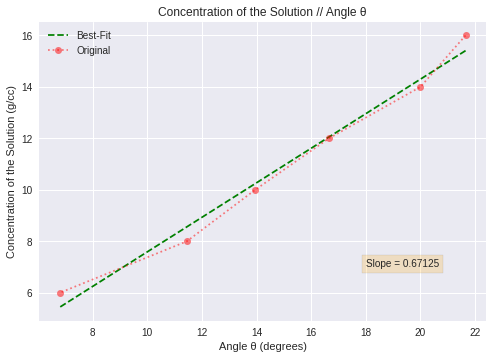

In [15]:
slope, inter =  np.polyfit(angle,c,1)
plt.plot(angle, slope*angle + inter, 'g--',label = "Best-Fit")
plt.plot(angle,c,':or',alpha = 0.5,label= 'Original')
plt.title('Concentration of the Solution // Angle θ')
plt.xlabel('Angle θ (degrees)')
plt.ylabel('Concentration of the Solution (g/cc)')
plt.legend()


plt.text(18,7,'Slope = {:.5f}'.format(slope),bbox=dict(facecolor='orange', alpha=0.2))


plt.savefig('graph',dpi = 300)

In [13]:
theta

5.349999999999994

In [244]:
1000 * theta/(74.4874918778428*20)

3.59120696987209

In [245]:
1000/(slope*20)

74.4874918778428

In [246]:
(1000*5.35)/(20* 74.487)

3.5912306845489823